# Life Expetency Prediction 

Variable Descriptions
1.country (Nominal) - the country in which the indicators are from.

2.year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015).

3.status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards.

4.life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year.

5.adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

6.infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

7.alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

8.percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

9.hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

10.measles (Ratio) - number of reported Measles cases per 1000 population

11.bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

12.under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

13.polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

14.total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

15.diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

16.hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

17.gdp (Ratio) - Gross Domestic Product per capita

18.population (Ratio) - population of a country

19.thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19.

20.thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

21.income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

22.schooling (Ratio) - average number of years of schooling of a population

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
import plotly.express as px
import plotly.express as plt
import pycountry
from sklearn.linear_model import LinearRegression
import sklearn
import sklearn.metrics as sm
import math
import plotly.graph_objects as go
#General
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data=pd.read_csv("Life Expectancy Data.csv")

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Understanding the Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

# Missing Value Analysis 

In [6]:
missing_percentage = data.isnull().mean() * 100

In [7]:
print(missing_percentage)

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [8]:
numerical_features = data.select_dtypes(include=['int', 'float'])
numerical_features

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
categorical_features = data.select_dtypes(include=['object'])
categorical_features

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


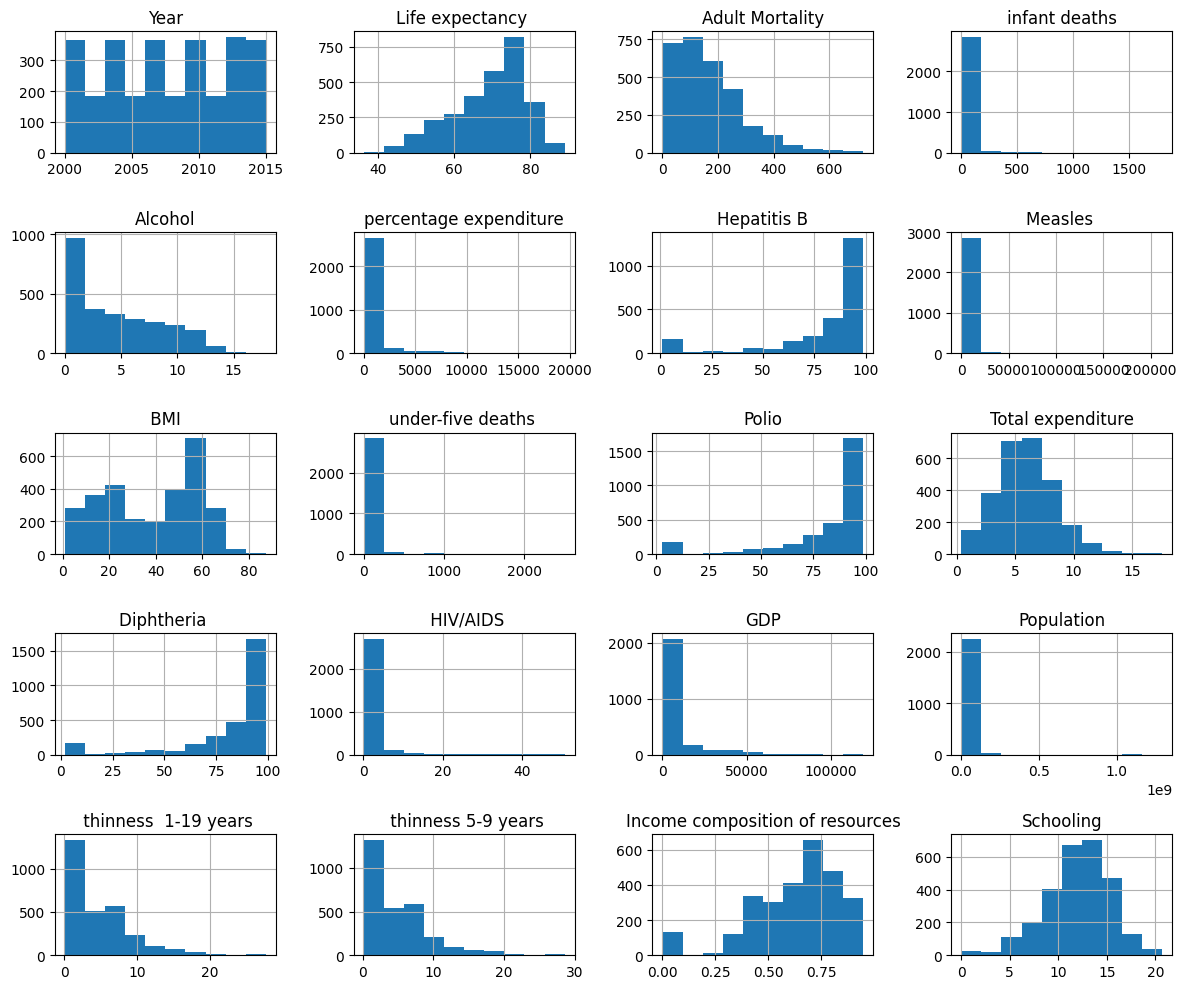

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
numerical_features .hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

We can see that most of the numrical values are either positively skewked or negatively skewed , Hence we will median for the 
imputation purpose.

In [11]:
numerical_features_filled = numerical_features.fillna(numerical_features.median())

In [12]:
numerical_features_filled.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

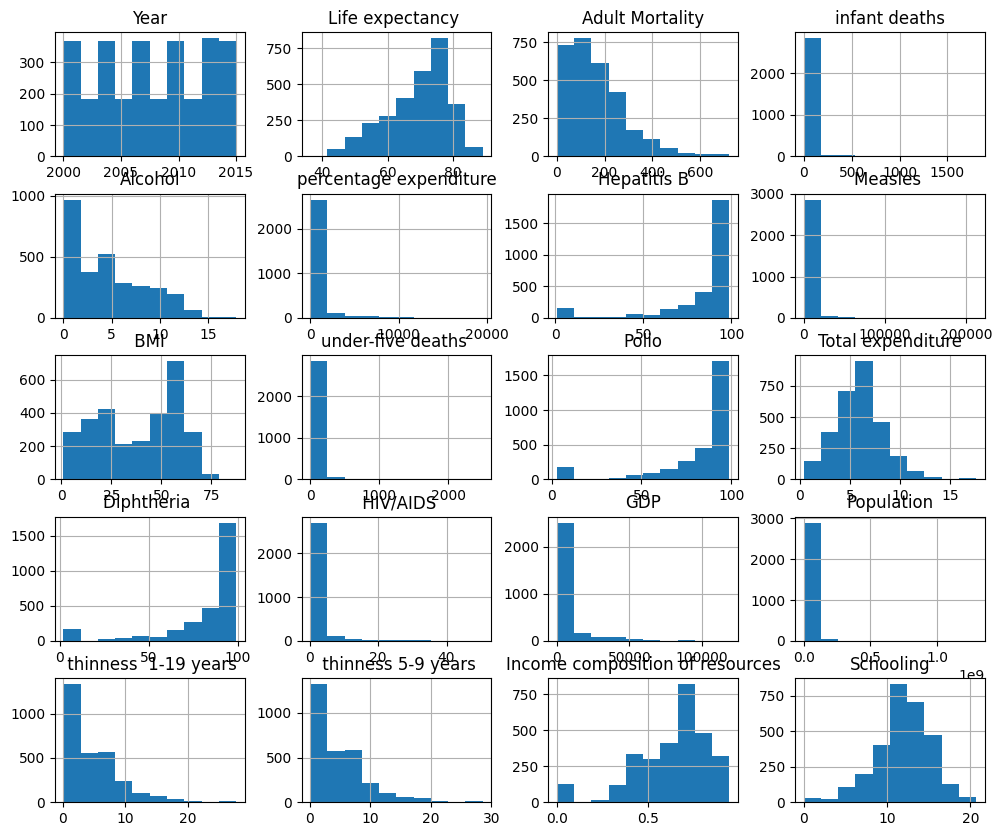

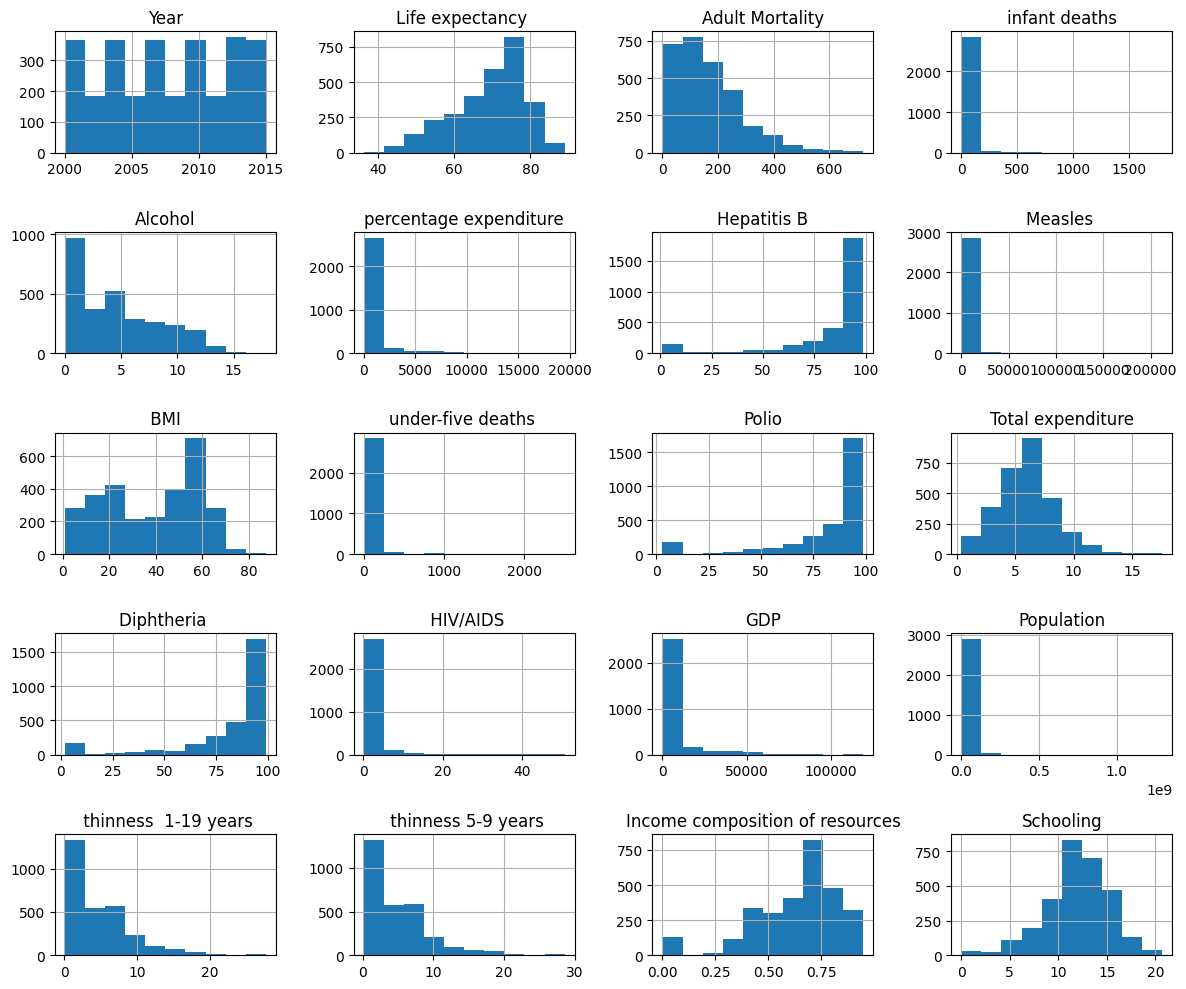

In [13]:
numerical_features_filled.hist(bins=10, figsize=(12, 10))
numerical_features_filled.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

We can see that after the missing value imputation the distribution are remain same of the variables 

# Outliers Analysis

In [14]:
numerical_features_filled1 = numerical_features_filled.iloc[:, 0:1].join(numerical_features_filled.iloc[:, 2:])

numerical_features_filled1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Adult Mortality                  2938 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2938 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2938 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2938 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2938 non-null   float64
 10  Total expenditure                2938 non-null   float64
 11  Diphtheria                       2938 non-null   float64
 12   HIV/AIDS           

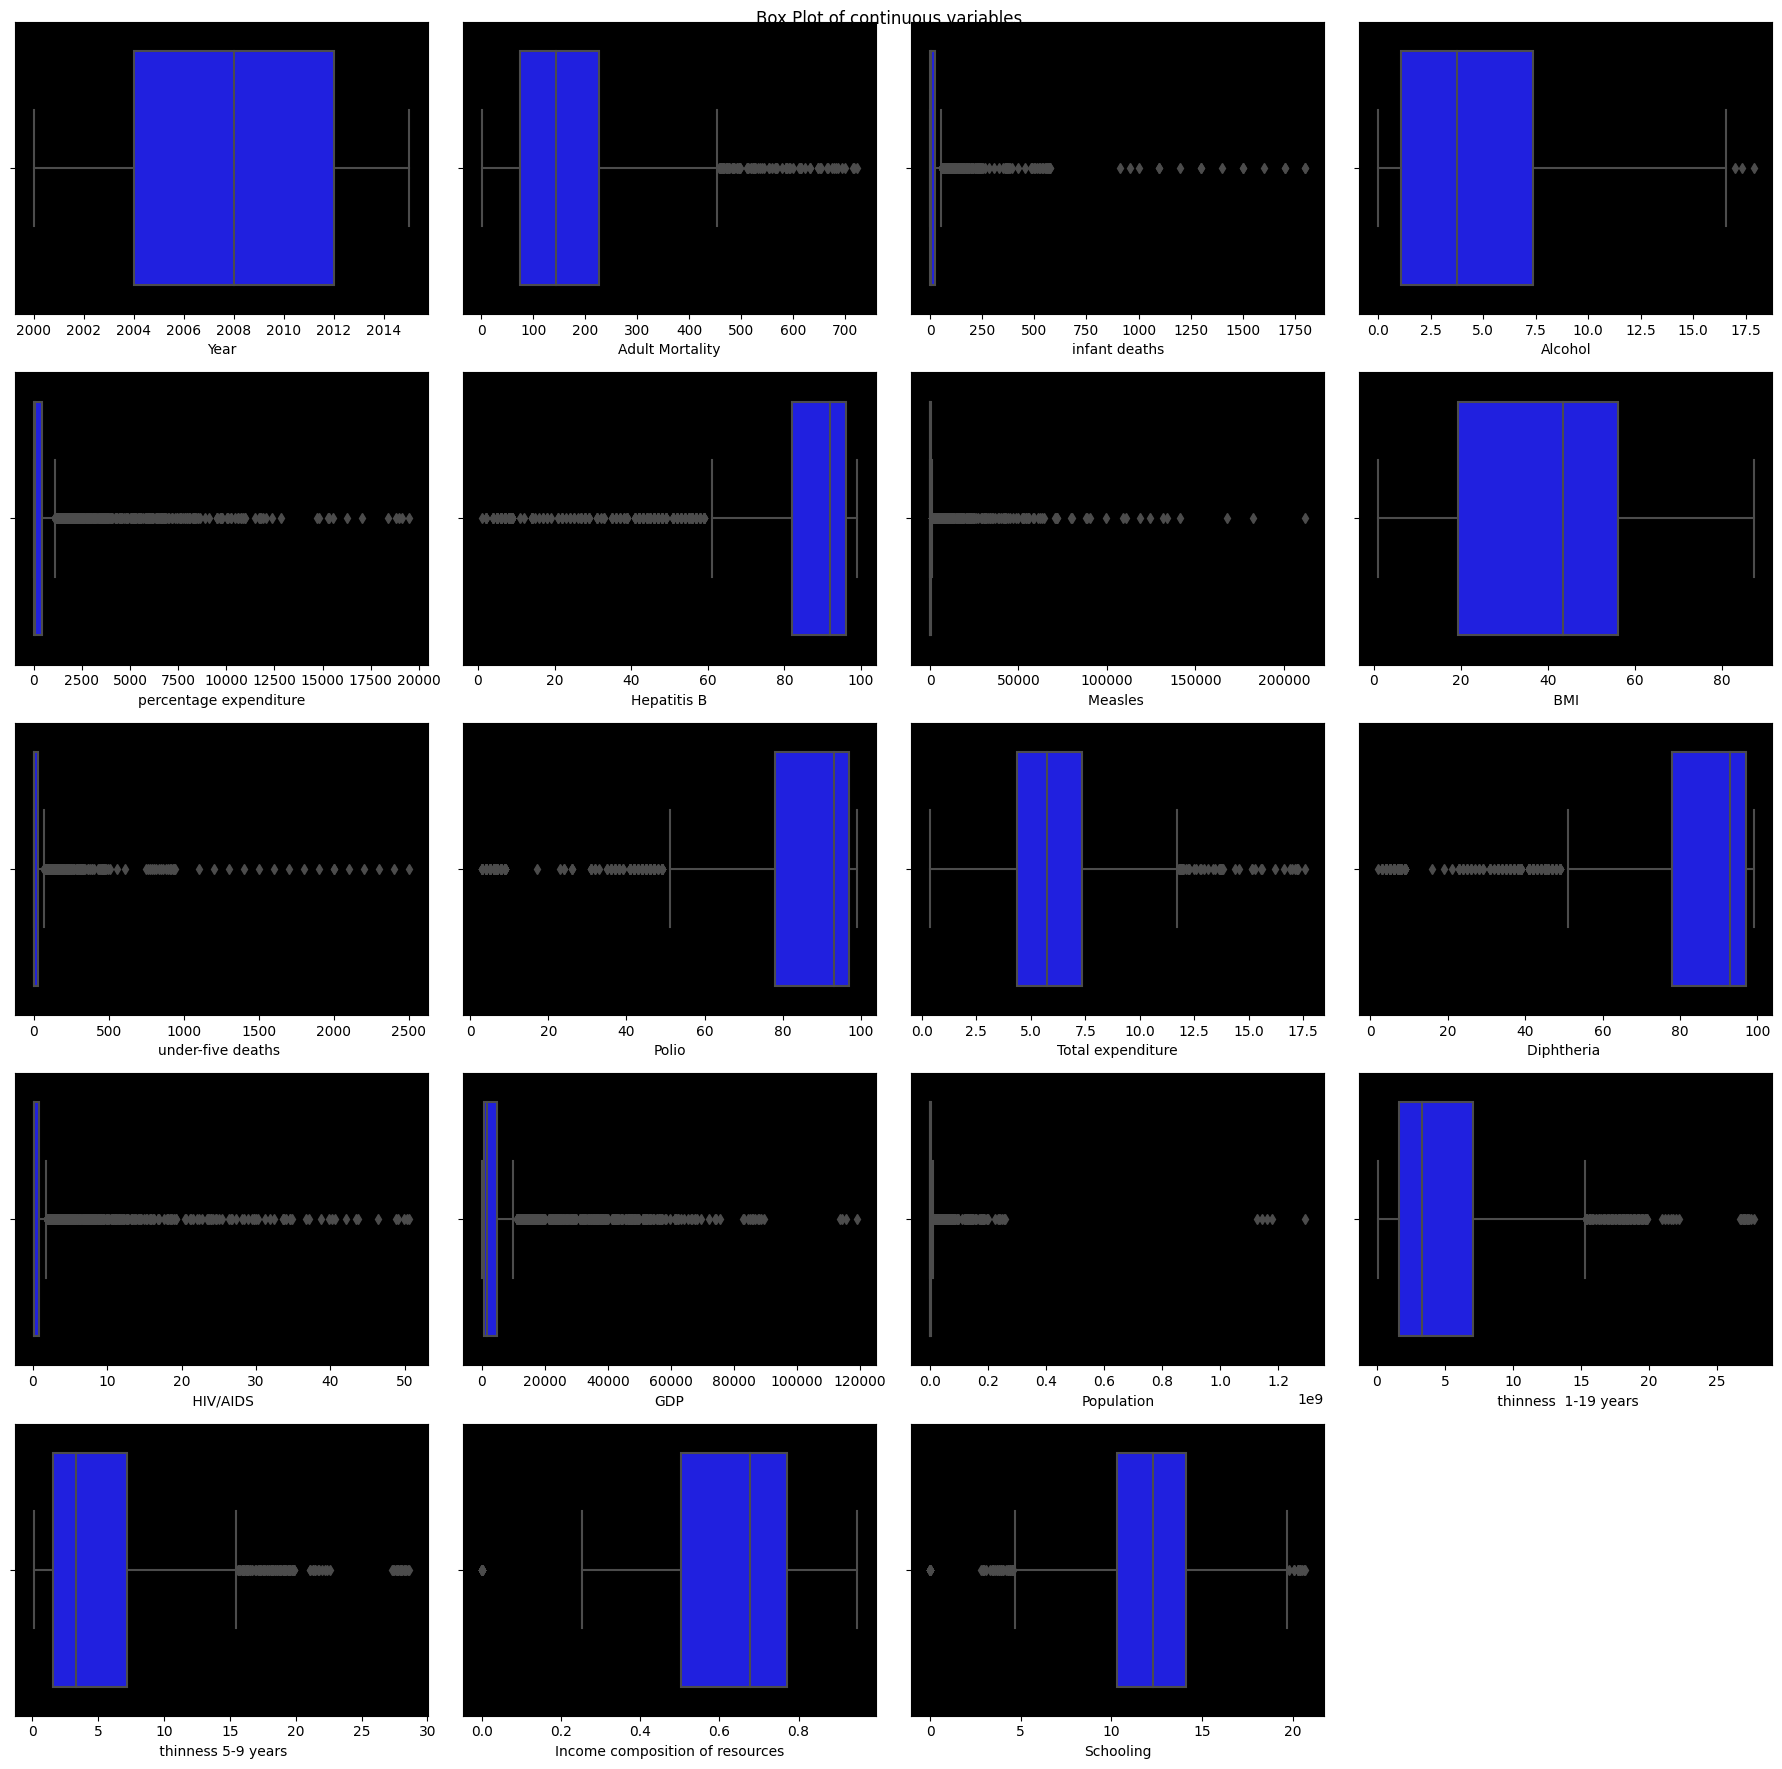

In [15]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numerical_features_filled1):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,4, i+1)
    sns.boxplot(data=numerical_features_filled, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

we can see that the all the features contains so many outliers . It can be effcet the our model badly . we shall use WINSORIZATION technique to handel the outlier.
Winsorization is the process of replacing the extreme values of statistical data with percentile value in order to limit the effect of the outliers on the calculations or the results obtained by using that data.

In [16]:
from scipy.stats.mstats import winsorize
for col in numerical_features_filled1:    
  numerical_features_filled1[col] = winsorize(numerical_features_filled1[col], limits=[0.2, 0.2],inclusive=(True, True))

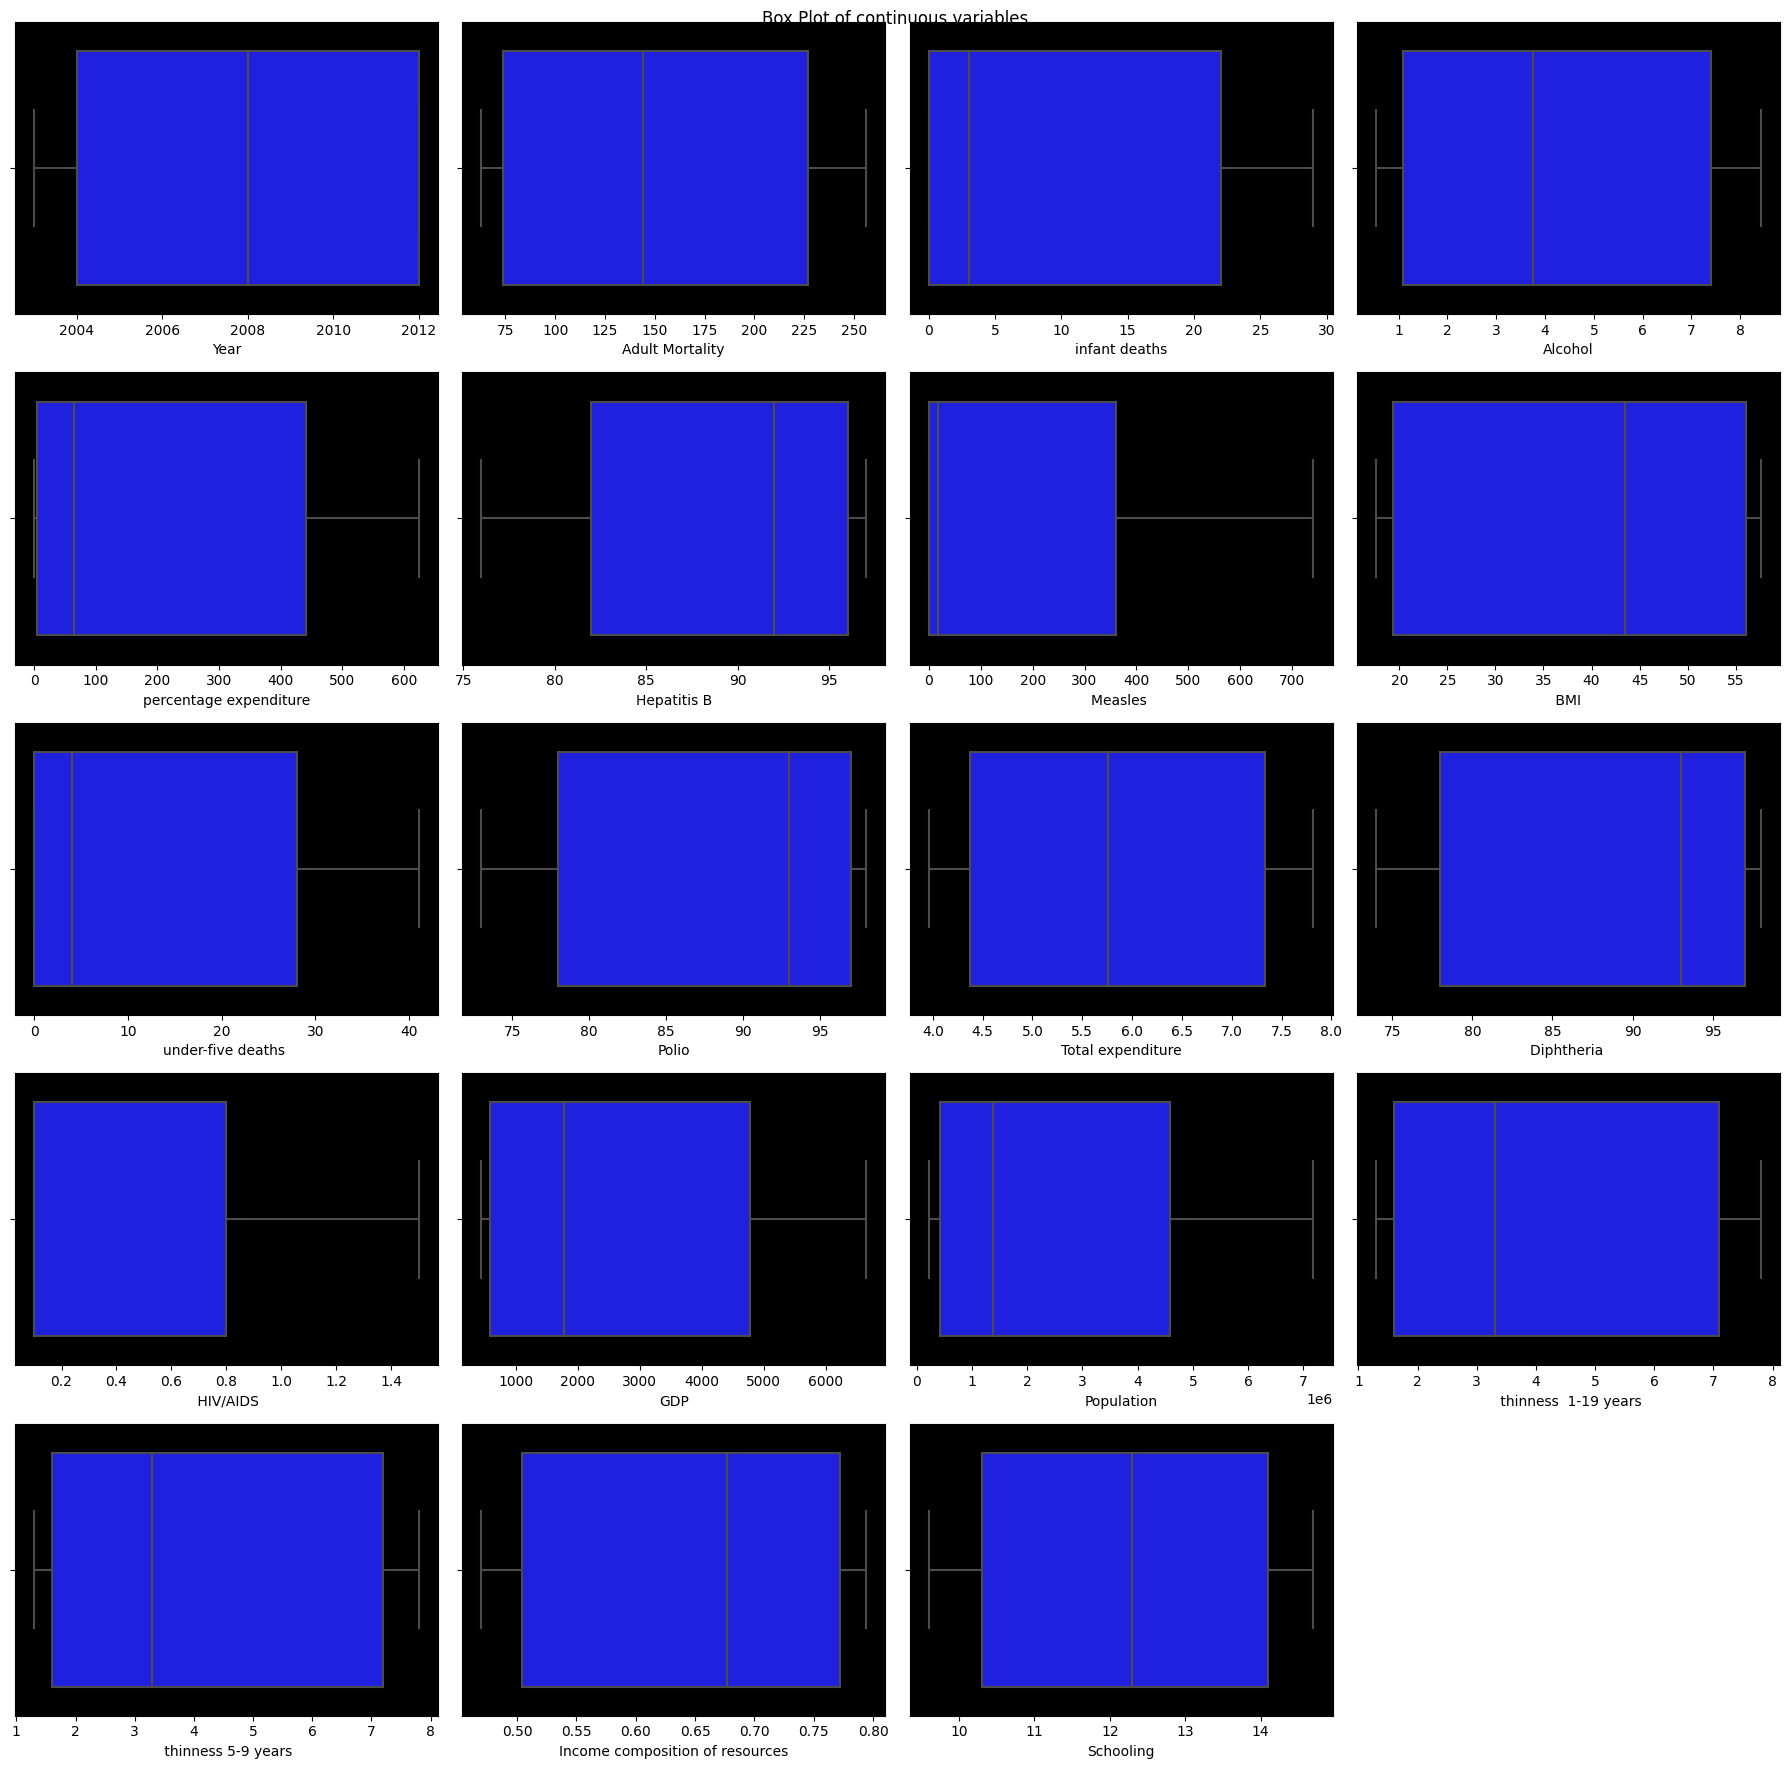

In [17]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(numerical_features_filled1):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,4, i+1)
    sns.boxplot(data=numerical_features_filled1, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

So after using the WINSORIZATION technique we can see that there is no outliers in the data set.

#  Exploratory Data Analysis

Skewness: -0.642391


<Axes: >

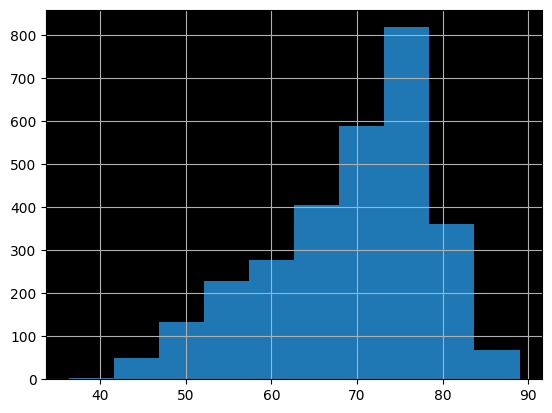

In [18]:
print("Skewness: %f" % numerical_features_filled['Life expectancy '].skew())
numerical_features_filled['Life expectancy '].hist()

The distribution of the dependent variable is not normal. .We know that if our dependent varibale is not normal , we may 
get the baised estimate the coefficents after fitting the linear model which may give the misleading result or analysis.
so we use power transformation to change the distribution of the dependent variable to normal distribution.

In [19]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
numerical_features_filled[['Life expectancy ']]=sc_X.fit_transform(numerical_features_filled[['Life expectancy ']])

Skewness: -0.105437


<Axes: >

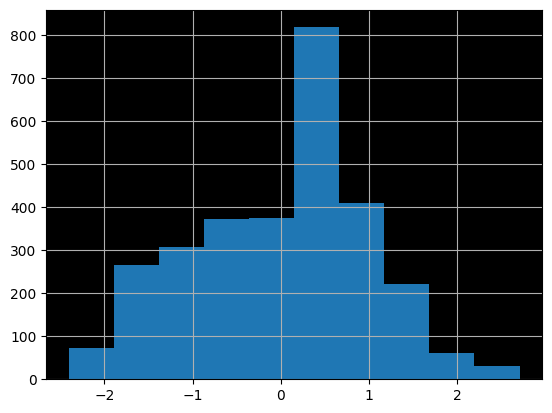

In [20]:
print("Skewness: %f" % numerical_features_filled['Life expectancy '].skew())
numerical_features_filled['Life expectancy '].hist()

We can see that after using the power transformation the distribution of the dependent variable transformed to a 
normal distribution.

In [21]:
corr_matrix = data.corr()

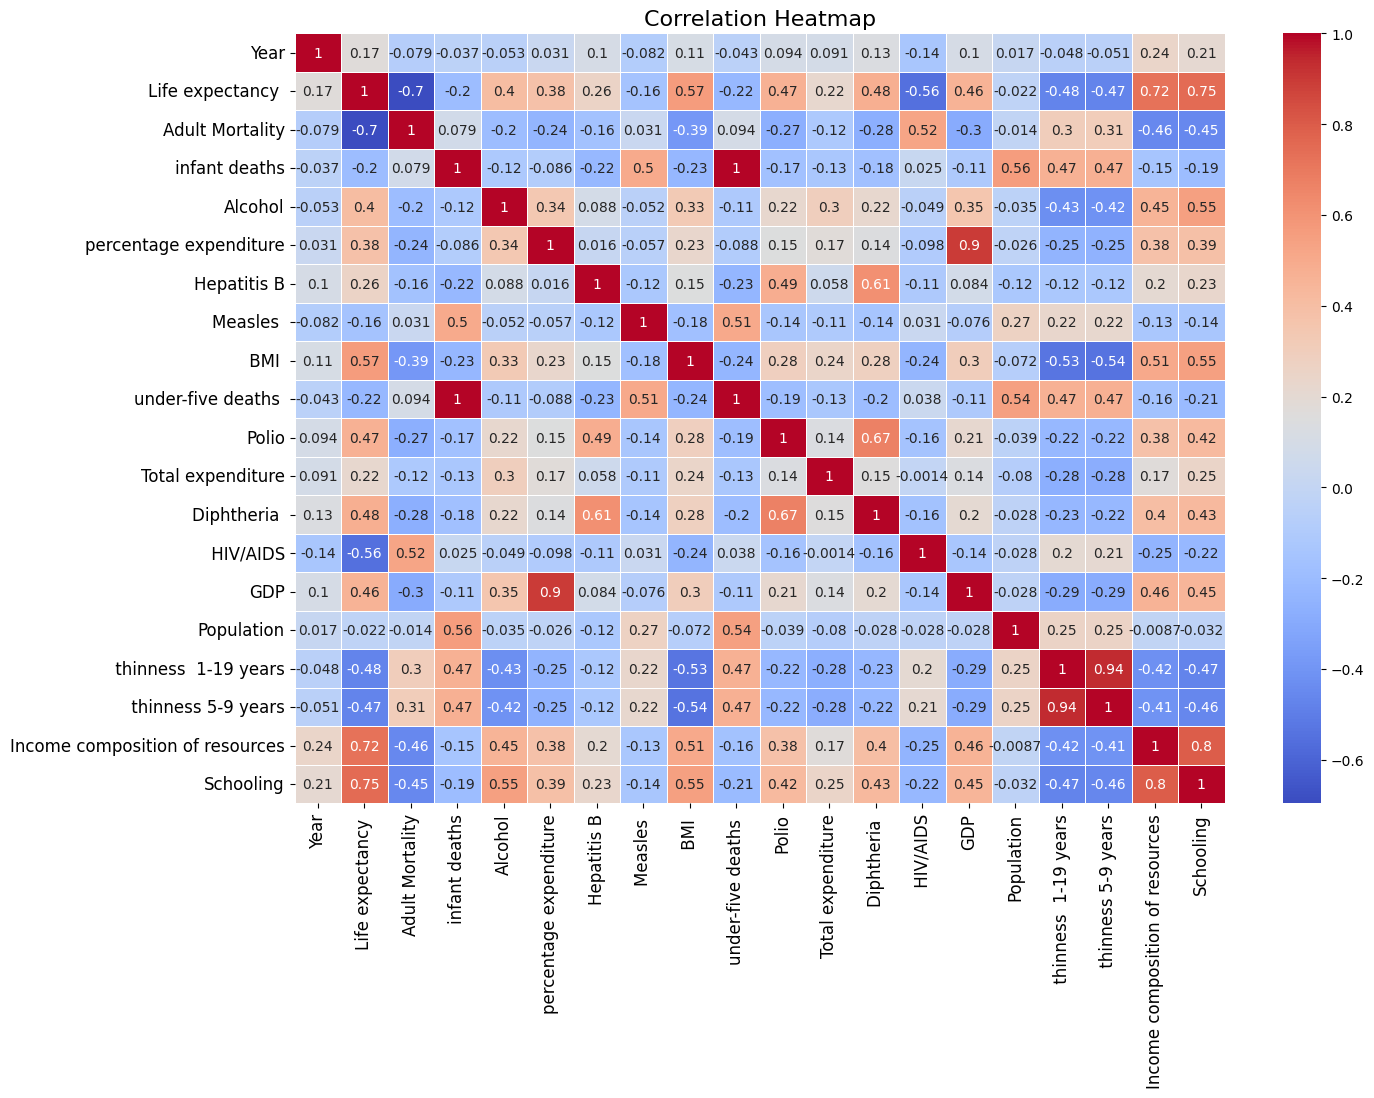

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Removing the unnecessary features

In [23]:
numerical_features_filled1=numerical_features_filled1.drop(['Year'],axis=1)

In [24]:
categorical_features=categorical_features.drop(['Country','Status'],axis=1)

In [25]:
data = pd.concat([numerical_features_filled1,numerical_features_filled['Life expectancy ']], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Adult Mortality                  2938 non-null   float64
 1   infant deaths                    2938 non-null   int64  
 2   Alcohol                          2938 non-null   float64
 3   percentage expenditure           2938 non-null   float64
 4   Hepatitis B                      2938 non-null   float64
 5   Measles                          2938 non-null   int64  
 6    BMI                             2938 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2938 non-null   float64
 9   Total expenditure                2938 non-null   float64
 10  Diphtheria                       2938 non-null   float64
 11   HIV/AIDS                        2938 non-null   float64
 12  GDP                 

In [26]:
data


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,256.0,29,0.54,71.279624,76.0,741,19.1,41,73.0,7.82,74.0,0.1,584.259210,7182451.0,7.8,7.8,0.479,10.1,-0.578111
1,256.0,29,0.54,73.523582,76.0,492,18.6,41,73.0,7.82,74.0,0.1,612.696514,327582.0,7.8,7.8,0.476,10.0,-1.047535
2,256.0,29,0.54,73.219243,76.0,430,18.1,41,73.0,7.82,74.0,0.1,631.744976,7182451.0,7.8,7.8,0.470,9.9,-1.047535
3,256.0,29,0.54,78.184215,76.0,741,17.6,41,73.0,7.82,74.0,0.1,669.959000,3696958.0,7.8,7.8,0.470,9.8,-1.081374
4,256.0,29,0.54,7.097109,76.0,741,17.6,41,73.0,7.82,74.0,0.1,441.532260,2978599.0,7.8,7.8,0.470,9.6,-1.106476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,256.0,27,4.36,0.000000,76.0,31,27.1,41,73.0,7.13,74.0,1.5,454.366654,7182451.0,7.8,7.8,0.470,9.6,-2.078145
2934,256.0,26,4.06,0.000000,76.0,741,26.7,41,73.0,6.52,74.0,1.5,453.351155,7182451.0,7.8,7.8,0.470,9.6,-2.068384
2935,73.0,25,4.43,0.000000,76.0,304,26.3,40,73.0,6.53,74.0,1.5,441.532260,216917.0,1.3,1.3,0.470,10.0,-2.053589
2936,256.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,1.5,548.587312,7182451.0,1.6,1.7,0.470,9.8,-2.028519


# Data Preprossing for Modeling 

In [27]:
x=data.iloc[:, 0:]  # Select all columns starting from the first column
y=data.iloc[:, 18]     # Select the first column

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

# Feature Selection using lasso regularzation 

In [30]:
### Apply Feature Selection

# The bigger the alpha the less features that will be selected.
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [31]:
feature_sel_model.get_support()

array([ True, False, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
        True])

In [32]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat =  x.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format(( x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 19
selected features: 8


In [33]:
selected_feat

Index(['Adult Mortality', 'Hepatitis B', ' BMI ', 'under-five deaths ',
       'Polio', 'Diphtheria ', ' thinness  1-19 years', 'Life expectancy '],
      dtype='object')

In [34]:
x_sel=x[selected_feat]

In [35]:
# Varice Inflation Factor
X3=x_sel
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['variable'] = X3.columns
vif

,VIF,variable
0,9.142843,Adult Mortality
1,204.474309,Hepatitis B
2,11.818323,BMI
3,2.638384,under-five deaths
4,586.261627,Polio
5,671.328267,Diphtheria
6,6.404037,thinness 1-19 years
7,3.520742,Life expectancy


In [36]:
# Step 3: Filter variables with VIF > 10
selected_variables = vif[vif['VIF'] >10]['variable']
# Print the selected variables
print(selected_variables)

1    Hepatitis B
2           BMI 
4          Polio
5    Diphtheria 
Name: variable, dtype: object


In [37]:
x_sel

,Adult Mortality,Hepatitis B,BMI,under-five deaths,Polio,Diphtheria,thinness 1-19 years,Life expectancy
0,256.0,76.0,19.1,41,73.0,74.0,7.8,-0.578111
1,256.0,76.0,18.6,41,73.0,74.0,7.8,-1.047535
2,256.0,76.0,18.1,41,73.0,74.0,7.8,-1.047535
3,256.0,76.0,17.6,41,73.0,74.0,7.8,-1.081374
4,256.0,76.0,17.6,41,73.0,74.0,7.8,-1.106476
...,...,...,...,...,...,...,...,...
2933,256.0,76.0,27.1,41,73.0,74.0,7.8,-2.078145
2934,256.0,76.0,26.7,41,73.0,74.0,7.8,-2.068384
2935,73.0,76.0,26.3,40,73.0,74.0,1.3,-2.053589
2936,256.0,76.0,25.9,39,76.0,75.0,1.6,-2.028519


In [38]:
x_sel1=x_sel.drop(columns=['Diphtheria '],axis=1)

In [39]:
x_sel1

,Adult Mortality,Hepatitis B,BMI,under-five deaths,Polio,thinness 1-19 years,Life expectancy
0,256.0,76.0,19.1,41,73.0,7.8,-0.578111
1,256.0,76.0,18.6,41,73.0,7.8,-1.047535
2,256.0,76.0,18.1,41,73.0,7.8,-1.047535
3,256.0,76.0,17.6,41,73.0,7.8,-1.081374
4,256.0,76.0,17.6,41,73.0,7.8,-1.106476
...,...,...,...,...,...,...,...
2933,256.0,76.0,27.1,41,73.0,7.8,-2.078145
2934,256.0,76.0,26.7,41,73.0,7.8,-2.068384
2935,73.0,76.0,26.3,40,73.0,1.3,-2.053589
2936,256.0,76.0,25.9,39,76.0,1.6,-2.028519


In [40]:
# Varice Inflation Factor
X7=x_sel1
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif['variable'] = X7.columns
vif

,VIF,variable
0,9.118214,Adult Mortality
1,175.508627,Hepatitis B
2,11.775849,BMI
3,2.629311,under-five deaths
4,182.715360,Polio
5,6.402129,thinness 1-19 years
6,3.465619,Life expectancy


In [41]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(x_sel1,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_train3=mm.fit_transform(x_train3)
x_test3=mm.transform(x_test3)

# Model Buliding 

In [43]:
import pandas as pd
import statsmodels.api as sm
model3 = sm.OLS(y_train3,x_train3)  # Create the OLS model
results3 = model3.fit() # Fit the model to the data

In [44]:
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.862
Method:                 Least Squares   F-statistic:                              2104.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):                        0.00
Time:                        19:41:12   Log-Likelihood:                         -985.49
No. Observations:                2350   AIC:                                      1985.
Df Residuals:                    2343   BIC:                                      2025.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
y_pred2= results3.predict(x_test3)

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test3, y_pred2)             
r2

0.8755118631993161

In [47]:
n = len(y_test3)                          # Number of observations in the test data
p = x_test3.shape[1] - 1                  # Number of predictors (excluding the constant term)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [48]:
adjusted_r2

0.8742262714251265

# Multiple Regression Model using all the variables

In [49]:
import pandas as pd
import statsmodels.api as sm
model4 = sm.OLS(y_train,x_train)  # Create the OLS model
results4 = model4.fit() # Fit the model to the data

In [50]:
print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1121.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):                        0.00
Time:                        19:41:57   Log-Likelihood:                         -597.95
No. Observations:                2350   AIC:                                      1234.
Df Residuals:                    2331   BIC:                                      1343.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
y_pred1= results4.predict(x_test)

In [52]:
n = len(y_test)                          # Number of observations in the test data
p = x_test.shape[1] - 1                  # Number of predictors (excluding the constant term)
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [54]:
adjusted_r2

0.871573749908609

# Conclusion

So fianlly we shall select the model based on 6 variables which is giving 87% Adjusted R2 on the test data.
